# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nltk

In [17]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [104]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Extremely sub-par service. H...
1,✅ Trip Verified | I virtually gave up on Brit...
2,✅ Trip Verified | I was pleasantly surprised ...
3,"✅ Trip Verified | British Airways is late, th..."
4,✅ Trip Verified | Flew from Amman to London on...


In [105]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3425 non-null   object
dtypes: object(1)
memory usage: 26.9+ KB


In [106]:
df.to_csv(r"C:\Users\RUDRO\OneDrive - The University of Kansas\RUDRO\Study Documents\BA_Forage_data_science/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [107]:
df = pd.read_csv(r'C:\Users\RUDRO\OneDrive - The University of Kansas\RUDRO\Study Documents\BA_Forage_data_science/BA_reviews.csv')
df

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Extremely sub-par service. H...
1,1,✅ Trip Verified | I virtually gave up on Brit...
2,2,✅ Trip Verified | I was pleasantly surprised ...
3,3,"✅ Trip Verified | British Airways is late, th..."
4,4,✅ Trip Verified | Flew from Amman to London on...
...,...,...
3420,3420,This was a bmi Regional operated flight on a R...
3421,3421,LHR to HAM. Purser addresses all club passenge...
3422,3422,My son who had worked for British Airways urge...
3423,3423,London City-New York JFK via Shannon on A318 b...


In [112]:
#remove ✅ Trip Verified in first column
df.iloc[:, 1] = df.iloc[:, 1].str.strip('✅ Trip Verified |')
df.iloc[:, 1] = df.iloc[:, 1].str.strip('Not Verified |')

In [115]:
df

,Unnamed: 0,reviews
0,0,Extremely sub-par service. Highlights: No onli...
1,1,I virtually gave up on British Airways about t...
2,2,I was pleasantly surprised that the airline co...
3,3,"British Airways is late, their website is atro..."
4,4,Flew from Amman to London on Nov. 14 2022. Not...
...,...,...
3420,3420,his was a bmi Regional operated flight on a RJ...
3421,3421,LHR to HAM. Purser addresses all club passenge...
3422,3422,My son who had worked for British Airways urge...
3423,3423,London City-New York JFK via Shannon on A318 b...


## Sentiment analysis, Topic modeling and Wordcloud

In [116]:
import re

In [118]:
df['reviews_processed'] = \
df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

In [120]:
# Convert the titles to lowercase
df['reviews_processed'] = \
df['reviews_processed'].map(lambda x: x.lower())

In [121]:
# Print out the first rows of papers
df['reviews_processed'].head()

0    extremely sub-par service highlights: no onlin...
1    i virtually gave up on british airways about t...
2    i was pleasantly surprised that the airline co...
3    british airways is late their website is atroc...
4    flew from amman to london on nov 14 2022 not s...
Name: reviews_processed, dtype: object

In [122]:
# Import the wordcloud library
from wordcloud import WordCloud

In [123]:
# Join the different processed titles together.
long_string = ','.join(list(df['reviews_processed'].values))

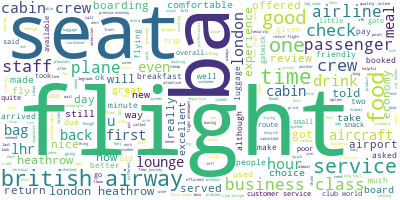

In [124]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [126]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RUDRO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [127]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [128]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [129]:
data = df.reviews_processed.values.tolist()
data_words = list(sent_to_words(data))

In [130]:
# remove stop words
data_words = remove_stopwords(data_words)

In [131]:
print(data_words[:1][0][:30])

['extremely', 'sub', 'par', 'service', 'highlights', 'online', 'meal', 'selection', 'staff', 'pretty', 'much', 'dropped', 'whatever', 'meal', 'rude', 'passenger', 'wanted', 'changed', 'last', 'meal', 'delayed', 'last', 'minutes', 'flight', 'plates', 'literally', 'grabbed', 'away', 'hand', 'unfinished']


In [132]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 4), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [152]:
from pprint import pprint # number of topics
num_topics = 20 # Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"flight" + 0.015*"ba" + 0.012*"food" + 0.012*"seat" + 0.011*"seats" + '
  '0.011*"class" + 0.011*"service" + 0.008*"airways" + 0.007*"economy" + '
  '0.006*"british"'),
 (1,
  '0.016*"ba" + 0.014*"service" + 0.011*"flight" + 0.009*"food" + 0.009*"seat" '
  '+ 0.008*"london" + 0.007*"heathrow" + 0.007*"seats" + 0.007*"crew" + '
  '0.007*"cabin"'),
 (2,
  '0.029*"flight" + 0.015*"ba" + 0.008*"service" + 0.007*"good" + '
  '0.007*"british" + 0.007*"airways" + 0.007*"staff" + 0.007*"seat" + '
  '0.006*"check" + 0.006*"time"'),
 (3,
  '0.024*"flight" + 0.010*"london" + 0.009*"ba" + 0.009*"service" + '
  '0.009*"airways" + 0.009*"british" + 0.008*"time" + 0.008*"crew" + '
  '0.008*"staff" + 0.008*"cabin"'),
 (4,
  '0.025*"flight" + 0.018*"ba" + 0.007*"seat" + 0.006*"service" + '
  '0.006*"airways" + 0.006*"back" + 0.005*"food" + 0.005*"one" + '
  '0.005*"british" + 0.005*"could"'),
 (5,
  '0.012*"ba" + 0.011*"flight" + 0.009*"service" + 0.009*"business" + '
  '0.009*"class" + 0

In [140]:
import os
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis

In [149]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join(r'C:\Users\RUDRO\OneDrive - The University of Kansas\RUDRO\Study Documents\BA_Forage_data_science\results'+str(num_topics))

In [151]:
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, r'C:\Users\RUDRO\OneDrive - The University of Kansas\RUDRO\Study Documents\BA_Forage_data_science\results'+ str(num_topics) +'.html')
LDAvis_prepared

C:\Users\RUDRO\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.009605  0.006000       1        1  16.833263
18     0.009554  0.005366       2        1  11.756843
15     0.015043 -0.000545       3        1   9.265880
10     0.007023  0.001463       4        1   8.155211
1      0.014541  0.003509       5        1   7.787512
6      0.006525 -0.003224       6        1   5.924049
13     0.011459  0.008086       7        1   5.297878
8      0.004512  0.010274       8        1   4.622337
14     0.004011 -0.002026       9        1   4.409075
16     0.004513  0.021101      10        1   3.695566
5      0.003594  0.000454      11        1   3.521324
4      0.002610  0.000395      12        1   3.356803
0      0.005951 -0.015464      13        1   2.640819
19    -0.002729  0.013598      14        1   2.412749
3     -0.002527  0.002583      15        1   2.335239
17     0.000858 -0.011029      16        1   2.040811
2      0.002831 -0.008787      17        1   1.981727
7     -0.024351 -0.039281      18        1   1.634379
9     -0.017416 -0.019315      19        1   1.452596
12    -0.055606  0.026844      20        1   0.875940, topic_info=         Term         Freq        Total Category  logprob  loglift
153        ba  4373.000000  4373.000000  Default  30.0000  30.0000
11     flight  6034.000000  6034.000000  Default  29.0000  29.0000
43    service  2484.000000  2484.000000  Default  28.0000  28.0000
606      crew  1976.000000  1976.000000  Default  27.0000  27.0000
167    london  2040.000000  2040.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
223       one     8.012638  1434.775187  Topic20  -5.7348  -0.4501
41      seats     8.043594  1933.786173  Topic20  -5.7309  -0.7447
59   aircraft     6.926318   793.996920  Topic20  -5.8805  -0.0041
529  business     6.978371  1444.748886  Topic20  -5.8730  -0.5952
45      staff     6.970322  1387.065968  Topic20  -5.8741  -0.5557

[1556 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
5201       3  0.492765       abundant
9768       7  0.585334  acclimatising
10953      4  0.523596         accord
10373      9  0.391635       accruals
10374      1  0.278827         accrue
...      ...       ...            ...
2454       3  0.075695            zrh
2454       4  0.151390            zrh
2454      11  0.227085            zrh
2454      12  0.075695            zrh
2454      17  0.075695            zrh

[4611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 19, 16, 11, 2, 7, 14, 9, 15, 17, 6, 5, 1, 20, 4, 18, 3, 8, 10, 13])